# Display image and saliency map

## Introduction
This is a small notebook to show images and generated saliency maps

Requires pandas, matplotlib, numpy, torch, torchvision

You need imagenet validation files (ILSVRC2012_devkit_t12.tar.gz & ILSVRC2012_img_val.tar) in an "imagenet" folder, and the npz of the method you want to show in a "npz" folder.


In [1]:
import pandas as pd
from os import path
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import torch
import os
from torchvision.datasets.imagenet import ImageNet
from torchvision import transforms
from skimage.transform import resize

## Parameters and method selection

In [3]:
val_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224, 224)),
        ])

indices_csv = "datasets/2000idx_ILSVRC2012.csv"
datasets_root = "."
dataset_name = "imagenet"

dataset = ImageNet(path.join(datasets_root, dataset_name), split='val', transform=val_transforms)
subset_indices = pd.read_csv(indices_csv, header=None)[0].to_numpy()
dataset = torch.utils.data.Subset(dataset, subset_indices)

5it [00:00, 18.44it/s]
5it [00:00, 19.95it/s]
5it [00:00, 18.50it/s]
5it [00:00, 19.94it/s]
5it [00:00, 16.07it/s]
5it [00:00, 19.96it/s]
5it [00:00, 19.97it/s]


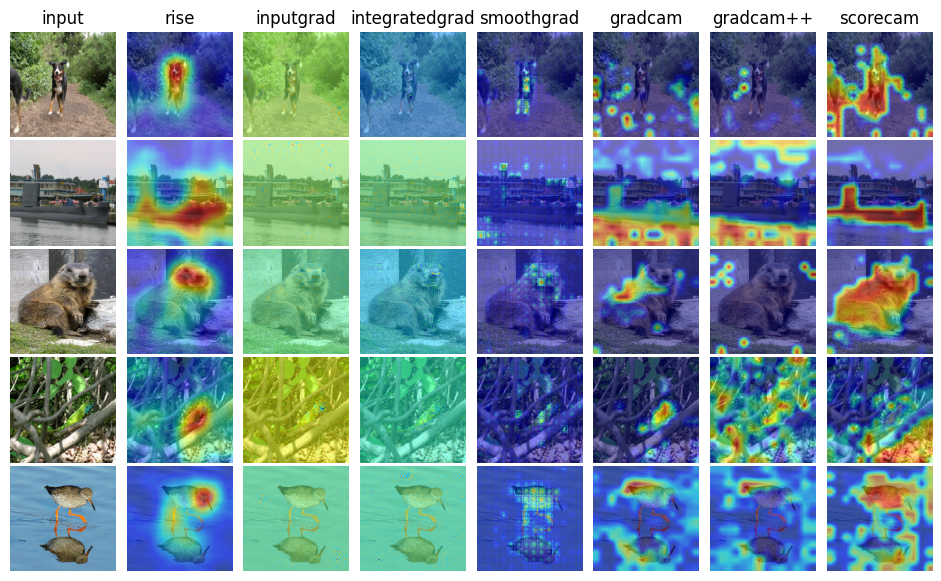

In [22]:
methods = ['rise', 'inputgrad', 'integratedgrad', 'smoothgrad', 'gradcam', 'gradcam++', 'scorecam']
# methods = ['rollout', 'chefer1', 'chefer2', 'btt', 'bth', 'tam', 'tis']
model = "vit_b16"
npz_folder = "npz"
# nmr images, meth + 1

import json
from tqdm import tqdm

fig, axs = plt.subplots(
    nrows=5, 
    ncols=8, 
    figsize=(12,7), 
    gridspec_kw=dict(hspace=0.03, wspace=0.03))

for i, method in enumerate(methods):

    npz_name = "2000idx/" + method + "_" + model + "_" + dataset_name + ".npz"
    saliencies_maps = np.load(path.join(npz_folder, npz_name))['arr_0']   

    for j, idx in tqdm(enumerate([42,3,4,8,29])):

        image = dataset[idx][0].permute(1,2,0)

        if method in ['btt', 'bth', 'tam']:
            heatmap = saliencies_maps[idx]
            heatmap = resize(heatmap, (224, 224))
        else:
            heatmap = saliencies_maps[idx][0]

        axs[0, 0].set_title('input')
        axs[0, i+1].set_title(method)

        axs[j, 0].imshow(image)
        axs[j, 0].axis('off')

        axs[j, i+1].imshow(image)
        axs[j, i+1].imshow(heatmap, alpha=0.5, cmap='jet')
        axs[j, i+1].axis('off')